In [55]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
auto_mpg = fetch_ucirepo(id=9) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets
df = pd.concat([X, y], axis=1)

In [57]:
print(df.shape)
print(df.head())

(398, 8)
   displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin   mpg  
0       1  18.0  
1       1  15.0  
2       1  18.0  
3       1  16.0  
4       1  17.0  


In [58]:
df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB
displacement    float64
cylinders         int64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
mpg             float64
dtype: object


In [59]:
missing_count = df.isna().sum()
missing_share = df.isna().mean()
display(pd.DataFrame({"missing_count": missing_count, "missing_share": missing_share}))
display(df.describe(include="all"))

,missing_count,missing_share
displacement,0,0.000000
cylinders,0,0.000000
horsepower,6,0.015075
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000
mpg,0,0.000000


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


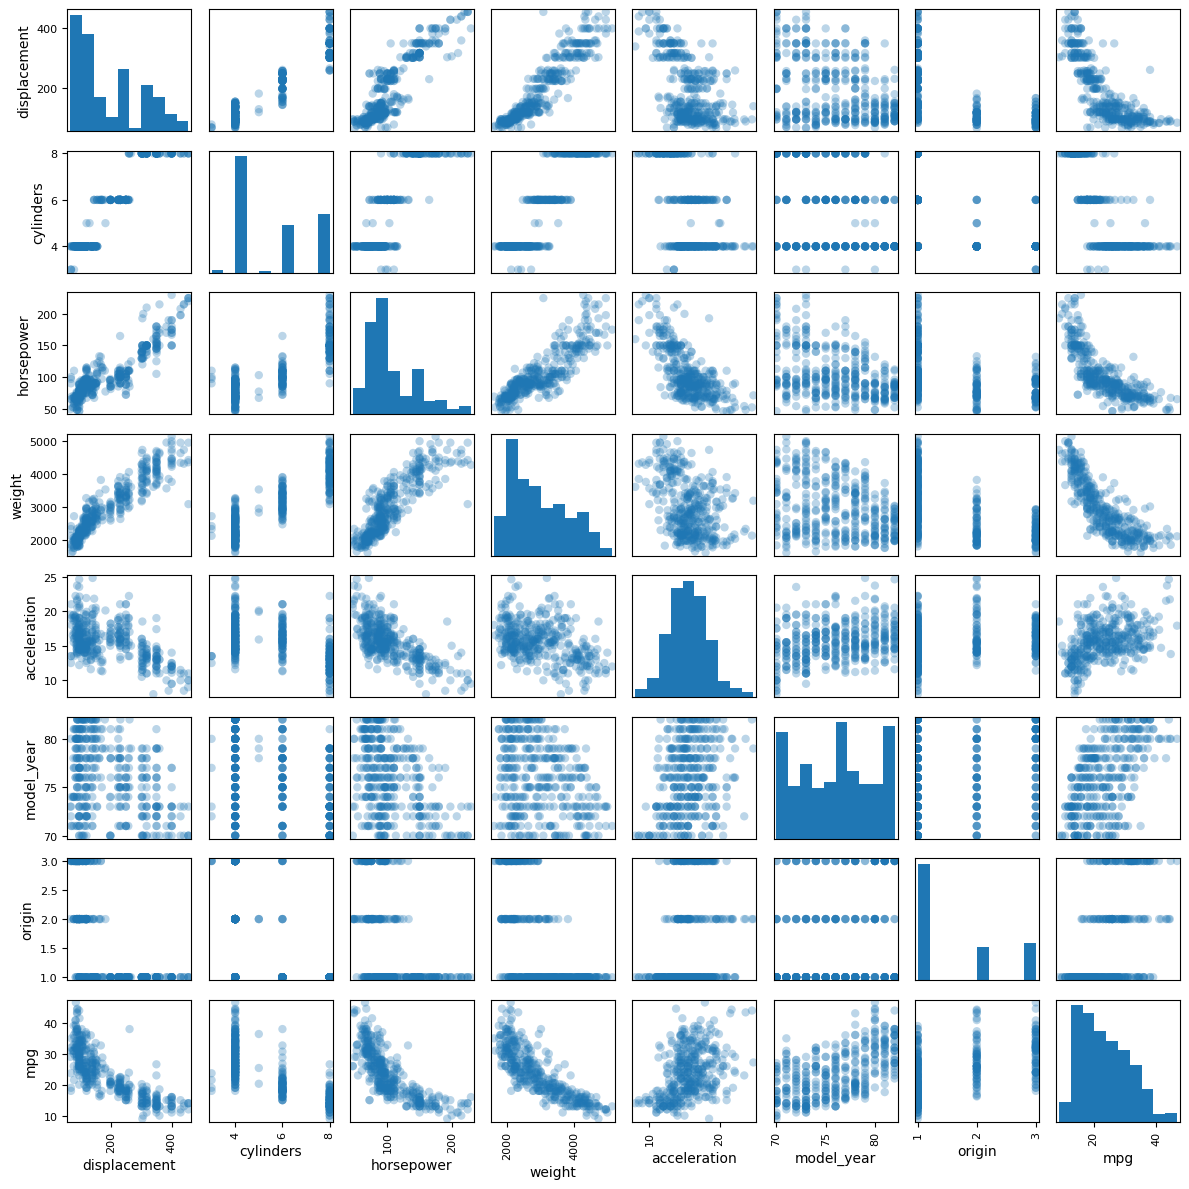

In [60]:
collumns = df.select_dtypes(include="number")

sampled = collumns.sample(n=min(2000, len(collumns)), random_state=42) if len(collumns) > 2000 else collumns

axes = scatter_matrix(
    sampled,
    figsize=(12, 12),
    diagonal="hist",
    alpha=0.3,
    marker="o",
    range_padding=0.05
)

for ax in axes.ravel():
    ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

In [61]:
df_clean = df.dropna()
train_data, test_data = train_test_split(df_clean, test_size=0.2, random_state=42)

X_train = train_data.drop('mpg', axis=1)
y_train = train_data['mpg']

X_test = test_data.drop('mpg', axis=1)
y_test = test_data['mpg']

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

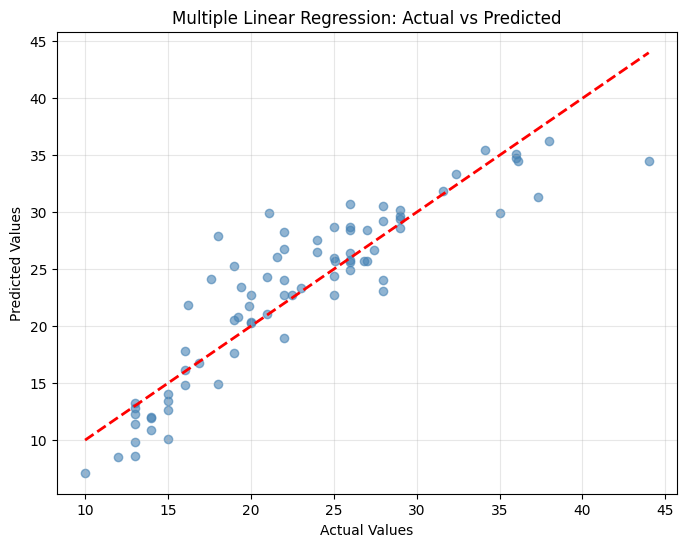

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

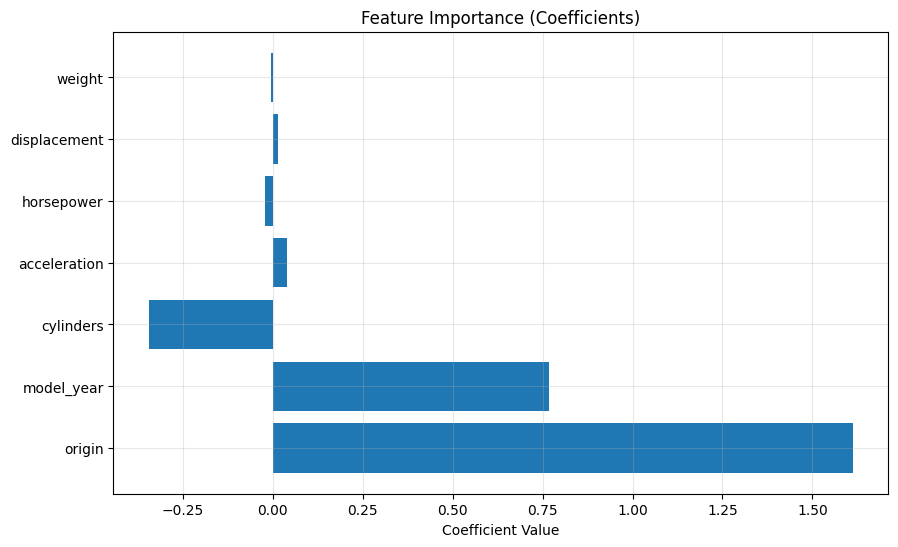

In [63]:
feature_names = X_train.columns
coefficients = model.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficients)')
plt.grid(True, alpha=0.3)
plt.show()

In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

MSE: 10.711
R² Score: 0.790
